# <font color=#023F7C> **Data cleaning and exploration** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2023 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

**What is Data Cleaning ?**<br>

Data cleaning is a crucial step in the data analysis and machine learning process, as the quality of the insights and models generated heavily relies on the accuracy and reliability of the underlying data. Raw data often contains **errors**, **inconsistencies**, **missing values**, and **outliers** that can distort results or lead to faulty conclusions. Data cleaning involves identifying and rectifying these issues, ensuring the dataset is trustworthy and suitable for analysis. 

Python provides a robust ecosystem of libraries and tools for data cleaning tasks. <br>
Python's versatility in data cleaning contributes significantly to producing accurate analyses and reliable machine learning models.
- The `Pandas`  library offers functions to handle missing data through imputation or removal, detect and remove duplicates, and transform data types. 
- The `NumPy` library can assist in dealing with outliers by providing statistical methods for outlier detection and filtering. 
- Additionally, visualization libraries like Matplotlib and Seaborn can help visually identify anomalies. 


**Before you start to working on this notebook ⚠️**: <br>
Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

**Business case** 💼: <br>
You've been provided a supply chain dataset by an organization that is trying to improve their supply chain operations.<br>
- The goal of the bootcamp is to use Machine Learning to be able to predict either `Late_delivery_risk` or `Delivery_Status` in the dataset. <br>
- Before building a Machine Learning model, an essential step is to clean and analyze the data with data visualization.



**Need help ? 🙏** <br>
You can go to the Introduction and Intermediate python notebooks to learn how to use the `pandas` library. <br>

## **1. Import libraries and dataset**
First, let's import Python libraries.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) #Show all columns

Then, let's import the dataset `dataset_train.csv` using pandas.


In [30]:
path='dataset_train.csv'

# Import the csv file
dataset = pd.read_csv(path,encoding='latin-1',sep=';', index_col=0)

## **2. Data discovery**

**Question 1**: <br> 
**Display the dataset's head and tail.**

In [31]:
dataset.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,lsnbda@kf2v1q.de,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,wseo84tf@uc0.com,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,yzimksmhb9a69x@lg3.uk,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,47o7f@hs33lrrzy.de,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,i8klginy@mpxxupn.uk,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [32]:
dataset.tail()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
135395,TRANSFER,50.000000,100.000000,Shipping on time,0,24,Women's Apparel,Goleta,EE. UU.,37efs0xs0ody@325xon1.fr,Thomas,5625,Smith,XXXXXXXXX,Consumer,CA,6876 Grand Park,93117.0,5,Golf,34.412930,-119.860718,LATAM,Mixco,Guatemala,5625,1/12/2015 11:43,788,502,0.0,0.00,1945,50.0,0.50,2,100.0,100.000000,50.000000,Central America,Guatemala,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,1/16/2015 11:43,Standard Class
135396,TRANSFER,35.000000,100.000000,Shipping on time,0,24,Women's Apparel,Chicago,EE. UU.,01dlkyr@r43p3dw4.com,Kenneth,11417,Whitney,XXXXXXXXX,Consumer,IL,6697 Thunder Dale Downs,60649.0,5,Golf,41.759094,-87.561768,LATAM,Colima,Mexico,11417,4/13/2017 4:36,57078,502,0.0,0.00,142776,50.0,0.35,2,100.0,100.000000,35.000000,Central America,Colima,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,4/17/2017 4:36,Standard Class
135397,TRANSFER,-40.740002,58.200001,Late delivery,1,29,Shop By Sport,Brooklyn,EE. UU.,s52lfoewbp9x@krcpuml3.uk,Crystal,4572,Lucero,XXXXXXXXX,Consumer,NY,415 Golden Meadow,11201.0,5,Golf,40.664894,-73.945335,LATAM,Ilopango,El Salvador,4572,4/3/2017 20:44,56439,642,1.8,0.03,141165,30.0,-0.70,2,60.0,58.200001,-40.740002,Central America,San Salvador,PENDING,NaN,642,29,NaN,http://images.acmesports.sports/Columbia+Men%2...,Columbia Men's PFG Anchor Tough T-Shirt,30.0,0,4/8/2017 20:44,Standard Class
135398,TRANSFER,34.919998,97.000000,Late delivery,0,24,Women's Apparel,Wichita,EE. UU.,0r0pgfg879xxll@o46i.com,Elizabeth,2001,Smith,XXXXXXXXX,Consumer,KS,4148 Round Parkway,67212.0,5,Golf,37.619770,-97.339600,LATAM,Mexico City,Mexico,2001,3/28/2017 22:51,56034,502,3.0,0.03,140098,50.0,0.36,2,100.0,97.000000,34.919998,Central America,Distrito Federal,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,4/2/2017 22:51,Standard Class
135399,TRANSFER,29.100000,97.000000,Shipping on time,0,24,Women's Apparel,Tonawanda,EE. UU.,lb174sqpdxu4jz@q7.com,Mary,4458,Smith,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,5,Golf,43.013969,-78.879066,LATAM,Tlalpan,Mexico,4458,3/13/2017 19:53,54998,502,3.0,0.03,137545,50.0,0.30,2,100.0,97.000000,29.100000,Central America,Distrito Federal,PENDING,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,3/17/2017 19:53,Standard Class


**Question 2**: <br> **Use the pandas function `.info()` to get general information on the dataset.**<br>

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135400 entries, 0 to 135399
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        135400 non-null  object 
 1   Benefit per order           135400 non-null  float64
 2   Sales per customer          135400 non-null  float64
 3   Delivery Status             135400 non-null  object 
 4   Late_delivery_risk          135400 non-null  int64  
 5   Category Id                 135400 non-null  int64  
 6   Category Name               135400 non-null  object 
 7   Customer City               135400 non-null  object 
 8   Customer Country            135400 non-null  object 
 9   Customer Email              135400 non-null  object 
 10  Customer Fname              135400 non-null  object 
 11  Customer Id                 135400 non-null  int64  
 12  Customer Lname              135394 non-null  object 
 13  Customer Password  

**What can you say about the loaded dataset ?**


**Question 3**:  <br> **Print all the columns/variables of the dataset.**

In [34]:
print(dataset.columns)
print("-------------")
print(dataset.values)

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Description', 'Product Image', 'Product Name', 'Product Price',
      

## **3. Analyze the dataframe's dtypes**
**Question 4**: <br> 
**Create 3 lists, each containing columns names with an int, float and object type.**
- List 1: Columns with an `int64` type
- List 2: Columns with a `float64` type
- List 3: Columns with an `object` type.

*Note: You can use pandas' `.select_dtypes()` function to get columns with a specific dtype.* <br>
*Create a list from a Pandas Dataframe/series with `.to_list()`*

In [35]:
columns_int = dataset.select_dtypes(include=['int64']).columns.to_list()
columns_float = dataset.select_dtypes(include=['float64']).columns.to_list()
columns_obj = dataset.select_dtypes(include=['object']).columns.to_list()

**Question 5**: <br> 
**Compute the number of unique values for the columns with an object and int type.** <br>

*Note: Combine the list with int columns and object columns using the `+` operator*. <br>
*Create a dataframe with the number of unique values and the corresponding variable.*

In [36]:
dataset_int_obj = dataset[columns_int + columns_obj]
dataset_int_obj

,Late_delivery_risk,Category Id,Customer Id,Department Id,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Id,Order Item Quantity,Product Card Id,Product Category Id,Product Status,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,0,73,20755,2,20755,77202,1360,180517,1,1360,73,0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,lsnbda@kf2v1q.de,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,1,73,19492,2,19492,75939,1360,179254,1,1360,73,0,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,wseo84tf@uc0.com,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,0,73,19491,2,19491,75938,1360,179253,1,1360,73,0,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,yzimksmhb9a69x@lg3.uk,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,0,73,19490,2,19490,75937,1360,179252,1,1360,73,0,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,47o7f@hs33lrrzy.de,Tana,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,0,73,19489,2,19489,75936,1360,179251,1,1360,73,0,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,i8klginy@mpxxupn.uk,Orli,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135395,0,24,5625,5,5625,788,502,1945,2,502,24,0,TRANSFER,Shipping on time,Women's Apparel,Goleta,EE. UU.,37efs0xs0ody@325xon1.fr,Thomas,Smith,XXXXXXXXX,Consumer,CA,6876 Grand Park,Golf,LATAM,Mixco,Guatemala,1/12/2015 11:43,Central America,Guatemala,PENDING,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,1/16/2015 11:43,Standard Class
135396,0,24,11417,5,11417,57078,502,142776,2,502,24,0,TRANSFER,Shipping on time,Women's Apparel,Chicago,EE. UU.,01dlkyr@r43p3dw4.com,Kenneth,Whitney,XXXXXXXXX,Consumer,IL,6697 Thunder Dale Downs,Golf,LATAM,Colima,Mexico,4/13/2017 4:36,Central America,Colima,PENDING,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,4/17/2017 4:36,Standard Class
135397,1,29,4572,5,4572,56439,642,141165,2,642,29,0,TRANSFER,Late delivery,Shop By Sport,Brooklyn,EE. UU.,s52lfoewbp9x@krcpuml3.uk,Crystal,Lucero,XXXXXXXXX,Consumer,NY,415 Golden Meadow,Golf,LATAM,Ilopango,El Salvador,4/3/2017 20:44,Central America,San Salvador,PENDING,http://images.acmesports.sports/Columbia+Men%2...,Columbia Men's PFG Anchor Tough T-Shirt,4/8/2017 20:44,Standard Class
135398,0,24,2001,5,2001,56034,502,140098,2,502,24,0,TRANSFER,Late delivery,Women's Apparel,Wichita,EE. UU.,0r0pgfg879xxll@o46i.com,Elizabeth,Smith,XXXXXXXXX,Consumer,KS,4148 Round Parkway,Golf,LATAM,Mexico City,Mexico,3/28/2017 22:51,Central America,Distrito Federal,PENDING,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,4/2/2017

In [37]:
unique_per_columns = dataset_int_obj.nunique()
unique_per_columns

Late_delivery_risk                 2
Category Id                       51
Customer Id                    18907
Department Id                     11
Order Customer Id              18907
Order Id                       56554
Order Item Cardprod Id           118
Order Item Id                 135400
Order Item Quantity                5
Product Card Id                  118
Product Category Id               51
Product Status                     1
Type                               4
Delivery Status                    4
Category Name                     50
Customer City                    563
Customer Country                   2
Customer Email                135400
Customer Fname                   774
Customer Lname                  1106
Customer Password                  1
Customer Segment                   3
Customer State                    46
Customer Street                 7331
Department Name                   11
Market                             5
Order City                      3549
O

<span style="color:red">"Product Status" is a non-informative variable as it has only one unique value in our dataset. We can drop it from our dataset.</span>

In [38]:
dataset = dataset.drop('Product Status', axis=1).reset_index(drop=True)

**Which column/variable has over 15 unique values ?**

In [39]:
unique_per_columns[unique_per_columns > 15]

Category Id                       51
Customer Id                    18907
Order Customer Id              18907
Order Id                       56554
Order Item Cardprod Id           118
Order Item Id                 135400
Product Card Id                  118
Product Category Id               51
Category Name                     50
Customer City                    563
Customer Email                135400
Customer Fname                   774
Customer Lname                  1106
Customer State                    46
Customer Street                 7331
Order City                      3549
Order Country                    164
order date (DateOrders)        56554
Order Region                      23
Order State                     1080
Product Image                    118
Product Name                     118
shipping date (DateOrders)     55043
dtype: int64

**Question 6**: <br>
**Compute the summary statistics of columns with a float type, with pandas' `.describe()` function.** <br>

**Do you detect outliers (weird/abnormal values) in the data ?**

## **4. Analyze missing values**

**Question 7**: <br> **Compute the number of NaN value for every variable/column** <br> 

*Note: A NaN value represents a missing value in a cell of the dataframe* <br>
*You can use the `.isna()` function.*

In [40]:
nb_missing_values_per_column = dataset.isna().sum(axis=0)
nb_missing_values_per_column

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Id                        0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Email                     0
Customer Fname                     0
Customer Id                        0
Customer Lname                     6
Customer Password                  0
Customer Segment                   0
Customer State                     0
Customer Street                    0
Customer Zipcode                   3
Department Id                      0
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
O

**Which variables of the dataset has missing values ?**

In [41]:
columns_with_missing_values = [x for x, y in zip((dataset.isna().sum(axis=0) > 0).keys(), (dataset.isna().sum(axis=0) > 0)) if y]
columns_with_missing_values

['Customer Lname', 'Customer Zipcode', 'Order Zipcode', 'Product Description']

**Question 8:** <br> 
**Drop the columns of the dataset that have missing values with `.dropna(axis=1)`. <br>**
Don't forget to add `.reset_index(drop=True)` after dropping the NaN values in the dataframe !

In [42]:
dataset = dataset.dropna(axis=1).reset_index(drop=True)
dataset

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Password,Customer Segment,Customer State,Customer Street,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,lsnbda@kf2v1q.de,Cally,20755,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,wseo84tf@uc0.com,Irene,19492,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,yzimksmhb9a69x@lg3.uk,Gillian,19491,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,47o7f@hs33lrrzy.de,Tana,19490,XXXXXXXXX,Home Office,CA,3200 Amber Bend,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,i8klginy@mpxxupn.uk,Orli,19489,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135395,TRANSFER,50.000000,100.000000,Shipping on time,0,24,Women's Apparel,Goleta,EE. UU.,37efs0xs0ody@325xon1.fr,Thomas,5625,XXXXXXXXX,Consumer,CA,6876 Grand Park,5,Golf,34.412930,-119.860718,LATAM,Mixco,Guatemala,5625,1/12/2015 11:43,788,502,0.000000,0.00,1945,50.00,0.50,2,100.00,100.000000,50.000000,Central America,Guatemala,PENDING,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.00,1/16/2015 11:43,Standard Class
135396,TRANSFER,35.000000,100.000000,Shipping on time,0,24,Women's Apparel,Chicago,EE. UU.,01dlkyr@r43p3dw4.com,Kenneth,11417,XXXXXXXXX,Consumer,IL,6697 Thunder Dale Downs,5,Golf,41.759094,-87.561768,LATAM,Colima,Mexico,11417,4/13/2017 4:36,57078,502,0.000000,0.00,142776,50.00,0.35,2,100.00,100.000000,35.000000,Central America,Colima,PENDING,

**If you don't want to drop rows, you can replace the missing values in each variable** <br>
Try the following methods only if the variable has a small number of NaN values (less than 10%).
- Replace with the mean or median value for continuous variables (mostly columns with a float dtype)
- Replace with the variable's most frequent value (`.mode()`) or by creating a new category for categorical variables (mostly columns with an int/object dtype)

You can drop the variables with a high number of missing values.

At this step, the dataset shouldn't have any missing values (you can check with `.isna().sum().sum()`)


**Question 9**: <br>
We want to share this dataset with a customer. Can we do this without modifying it? <br>
If not, drop the element/variables that we have to delete

In [43]:
dataset.columns.values

array(['Type', 'Benefit per order', 'Sales per customer',
       'Delivery Status', 'Late_delivery_risk', 'Category Id',
       'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Image', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [44]:
confidential_data = ['Customer Email', 'Customer Fname','Customer Street','Customer Password']

In [45]:
data_for_customers = dataset.drop(confidential_data, axis=1)
data_for_customers

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135395,TRANSFER,50.000000,100.000000,Shipping on time,0,24,Women's Apparel,Goleta,EE. UU.,5625,Consumer,CA,5,Golf,34.412930,-119.860718,LATAM,Mixco,Guatemala,5625,1/12/2015 11:43,788,502,0.000000,0.00,1945,50.00,0.50,2,100.00,100.000000,50.000000,Central America,Guatemala,PENDING,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.00,1/16/2015 11:43,Standard Class
135396,TRANSFER,35.000000,100.000000,Shipping on time,0,24,Women's Apparel,Chicago,EE. UU.,11417,Consumer,IL,5,Golf,41.759094,-87.561768,LATAM,Colima,Mexico,11417,4/13/2017 4:36,57078,502,0.000000,0.00,142776,50.00,0.35,2,100.00,100.000000,35.000000,Central America,Colima,PENDING,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.00,4/17/2017 4:36,Standard Class
135397,TRANSFER,-40.740002,58.200001,Late delivery,1,29,Shop By Sport,Brooklyn,EE. UU.,4572,Consumer,NY,5,Golf,40.664894,-73.945335,LATAM,Ilopango,El Salvador,4572,4/3/2017 20:44,56439,642,1.800000,0.03,141165,30.00,-0.70,2,60.00,58.200001,-40.740002,Central America,San Salvador,PENDING,642,29,http://images.acmesports.sports/Columbia+Men%2...,Colu

In [46]:
dataset['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

<Axes: xlabel='Delivery Status'>

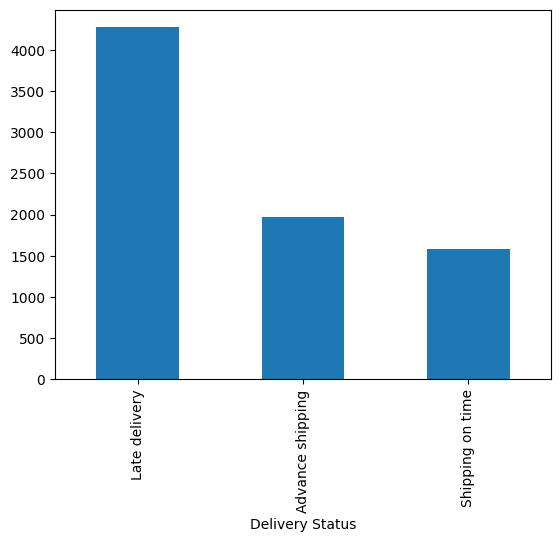

In [47]:
# plot Delivery Status per Order Status where Order status is not CANCELED and show values on the bars
dataset[dataset['Order Status'] == 'ON_HOLD']['Delivery Status'].value_counts().plot(kind='bar')
# sns.countplot(x='Order Status', hue='Delivery Status', data=dataset)

**Question 10**: <br>
**Save the cleaned dataframe as a csv file called `dataset_train_clean.csv` using pandas' `.to_csv()` function.** <br>
*Note: Make sure to add `index=False` to the `.to_csv()` function or else the index of the dataframe will be saved too.*

In [48]:
data_for_customers.to_csv("dataset_train_clean.csv", index=False, sep=',')